In [2]:
from statsmodels.tsa.arima_model import ARIMA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')
from pylab import rcParams
import plotly.graph_objs as go
import os


In [3]:
df=pd.read_csv('USCPI2.csv.xls')
df.head

<bound method NDFrame.head of             date      CPI
0     01-01-1913    9.800
1     01-02-1913    9.800
2     01-03-1913    9.800
3     01-04-1913    9.800
4     01-05-1913    9.700
...          ...      ...
1298  01-03-2021  264.877
1299  01-04-2021  267.054
1300  01-05-2021  269.195
1301  01-06-2021  271.696
1302  01-07-2021  273.003

[1303 rows x 2 columns]>

In [7]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.CPI.dropna())
print('ADF Statistic: %f'%result[0])
print('p-CPI:%f'%result[1])

ADF Statistic: 4.138694
p-CPI:1.000000


In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

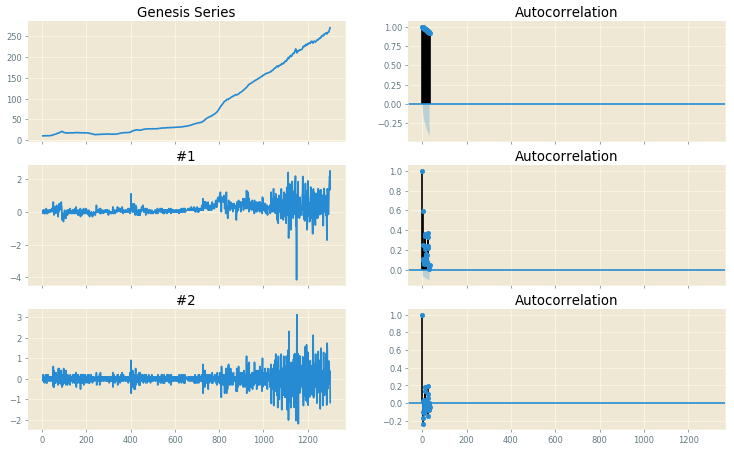

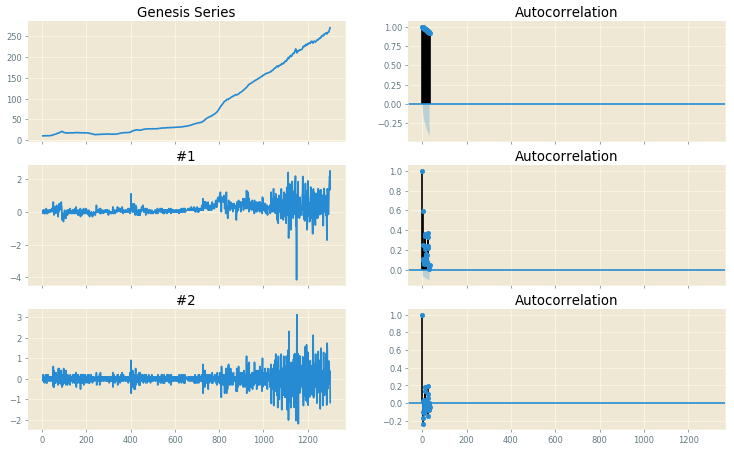

In [9]:
plt.rcParams.update({'figure.figsize':(15,9),'figure.dpi':60})
#Genesis series
fig,axes=plt.subplots(3,2,sharex=True)
axes[0,0].plot(df.CPI);axes[0,0].set_title('Genesis Series')
plot_acf(df.CPI,ax=axes[0,1])
#differentiate the serie
#1
axes[1,0].plot(df.CPI.diff());axes[1,0].set_title('#1')
plot_acf(df.CPI.diff().dropna(),ax=axes[1,1])
#2
axes[2,0].plot(df.CPI.diff().diff());axes[2,0].set_title('#2')
plot_acf(df.CPI.diff().diff().dropna(),ax=axes[2,1])   # we can see that time series reaches stationarity 

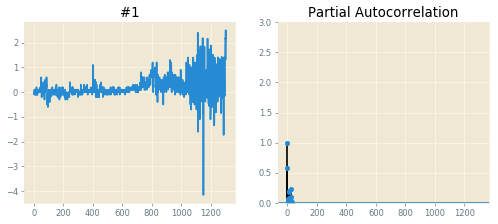

In [10]:
#inspecting
#PACF 1 
plt.rcParams.update({'figure.figsize':(10,4),'figure.dpi':60})
fig,axes=plt.subplots(1,2,sharex=True)
axes[0].plot(df.CPI.diff());axes[0].set_title('#1')
axes[1].set(ylim=(0,3))
plot_pacf(df.CPI.diff().dropna(),ax=axes[1])
plt.show()                                 # PACF #1 is way above the significiance line                      

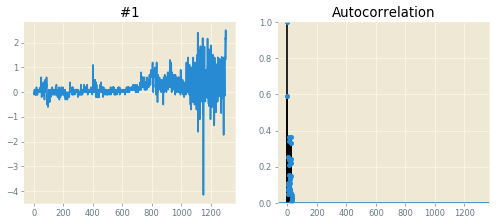

 we need q as 2


In [11]:
# find the MA   #tsaplot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plt.rcParams.update({'figure.figsize':(10,4),'figure.dpi':60})
fig,axes=plt.subplots(1,2,sharex=True)
axes[0].plot(df.CPI.diff());axes[0].set_title('#1')
axes[1].set(ylim=(0,1))
plot_acf(df.CPI.diff().dropna(),ax=axes[1])
plt.show()
print(' we need q as 2')

In [12]:
from statsmodels.tsa.arima_model import ARIMA 
model=ARIMA(df.CPI,order=(1,1,2))
model_fit=model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                 1302
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -486.085
Method:                       css-mle   S.D. of innovations              0.351
Date:                Sat, 18 Dec 2021   AIC                            982.170
Time:                        00:39:12   BIC                           1008.029
Sample:                             1   HQIC                           991.872
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2024      0.020     10.063      0.000       0.163       0.242
ar.L1.D.CPI     0.1887      0.137      1.377      0.168      -0.080       0.457
ma.L1.D.CPI     0.4952      0.138      3.596    

In [24]:
df

,date,CPI
0,01-01-1913,9.800
1,01-02-1913,9.800
2,01-03-1913,9.800
3,01-04-1913,9.800
4,01-05-1913,9.700
...,...,...
1298,01-03-2021,264.877
1299,01-04-2021,267.054
1300,01-05-2021,269.195
1301,01-06-2021,271.696


In [13]:
model=ARIMA(df.CPI,order=(1,1,1))
model_fit=model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                  D.CPI   No. Observations:                 1302
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -487.940
Method:                       css-mle   S.D. of innovations              0.352
Date:                Sat, 18 Dec 2021   AIC                            983.880
Time:                        00:39:16   BIC                           1004.567
Sample:                             1   HQIC                           991.641
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2026      0.022      9.350      0.000       0.160       0.245
ar.L1.D.CPI     0.4505      0.039     11.584      0.000       0.374       0.527
ma.L1.D.CPI     0.2220      0.041      5.386    

<function matplotlib.pyplot.show(*args, **kw)>

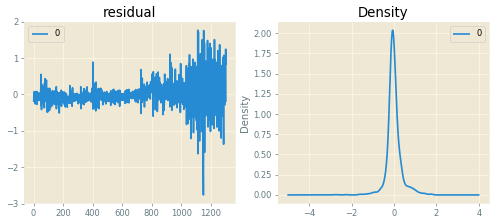

In [14]:
residual=pd.DataFrame(model_fit.resid)
fig,ax=plt.subplots(1,2)
residual.plot(title='residual',ax=ax[0])
residual.plot(kind='kde',title='Density',ax=ax[1])
plt.show
#look good lets predict

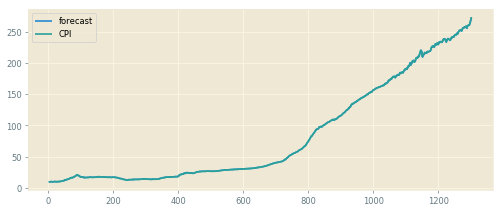

In [17]:
#predict actual vs fitted
model_fit.plot_predict(dynamic=False) #dynacmic false=lag 
plt.show()

# after lets try to comparate this arima model to see if it's good in performance

                             ARIMA Model Results                              
Dep. Variable:                 D2.CPI   No. Observations:                   83
Model:                 ARIMA(3, 2, 1)   Log Likelihood                  44.530
Method:                       css-mle   S.D. of innovations              0.141
Date:                Sat, 18 Dec 2021   AIC                            -77.060
Time:                        00:40:29   BIC                            -62.547
Sample:                             2   HQIC                           -71.230
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0049      0.006      0.834      0.404      -0.007       0.016
ar.L1.D2.CPI    -0.6377      0.342     -1.866      0.062      -1.307       0.032
ar.L2.D2.CPI    -0.5042      0.211     -2.38

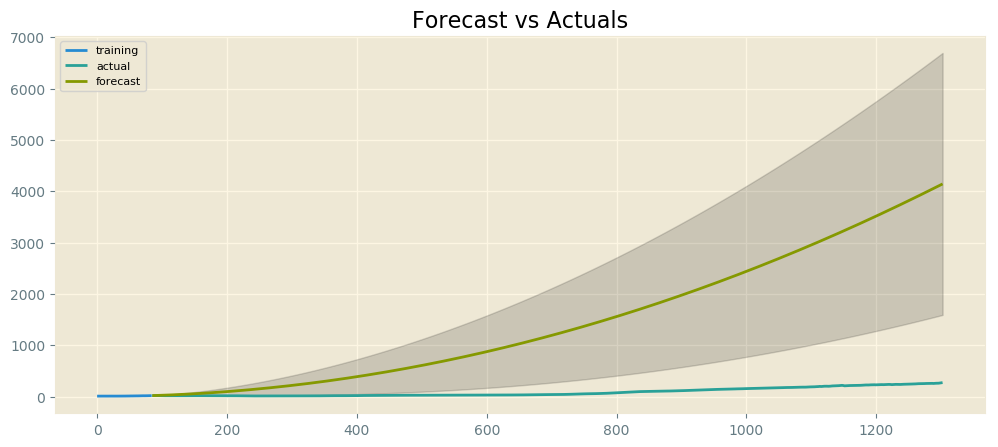

In [18]:
from statsmodels.tsa.stattools import acf
train=df.CPI[:85]
test=df.CPI[85:]
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())
# Forecast
fc, se, conf = fitted.forecast(1218, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [19]:
# lets try to use sarima model instead

In [20]:
data = pd.read_csv('USCPI2.csv.xls', parse_dates=['date'], index_col='date')

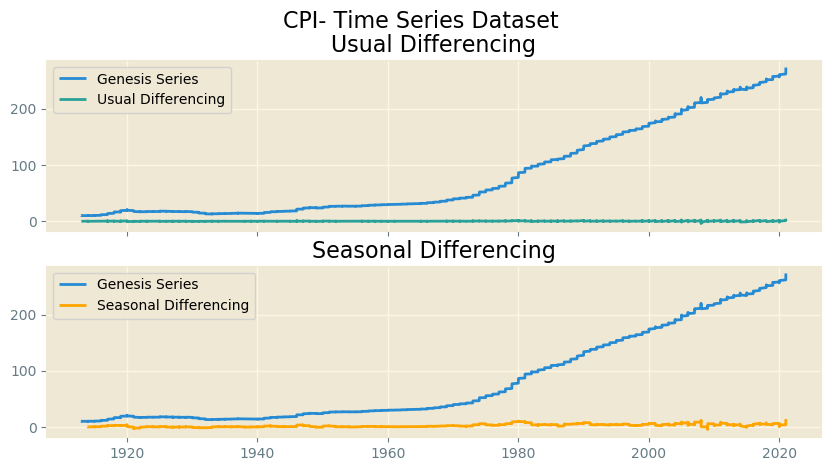

In [21]:
# Plot
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Genesis Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)
# Seasonal Differencing
axes[1].plot(data[:], label='Genesis Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='Orange')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('CPI- Time Series Dataset', fontsize=16)
plt.show()

In [33]:
data

,CPI
date,
1913-01-01,9.800
1913-01-02,9.800
1913-01-03,9.800
1913-01-04,9.800
1913-01-05,9.700
...,...
2021-01-03,264.877
2021-01-04,267.054
2021-01-05,269.195


In [25]:
import pmdarima as pm
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=735.657, Time=5.62 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6160.825, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=3.21 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.99 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6925.417, Time=0.05 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1499.504, Time=0.81 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=733.313, Time=7.21 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1121.813, Time=3.69 sec
 ARIMA(1,0,1)(2,1,1)[12] intercept   : AIC=781.261, Time=18.70 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=16.45 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=728.962, Time=16.47 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=7.01 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1084.995, Time=10.45 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AIC=688.680, Time=16.65 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1303
Model:             SARIMAX(2, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood                -337.823
Date:                                 Sat, 18 Dec 2021   AIC                            687.646
Time:                                         00:56:41   BIC                            718.625
Sample:                                              0   HQIC                           699.274
                                                - 1303                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3436      0.024     57.024      0.000       1.297       1.390
ar.L2         -0.3437      0.024    -14.581      0.000      -0.390      -0.298
ma.L1          0.2317      0.025      9.423      0.000       0.183       0.280
ma.S.L12      -0.9711      0.016    -61.870      0.000      -1.002      -0.940
ma.S.L24       0.0939      0.015      6.331      0.000       0.065       0.123
sigma2         0.0970      0.002     55.887      0.000       0.094       0.100
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6673.74
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):              10.77   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

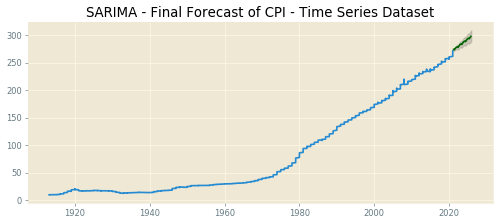

In [26]:
# Forecast
n_periods=60
fitted,confint=smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of CPI - Time Series Dataset")
plt.show()

In [53]:
def num_period(input_date):
    base_date = pd.to_datetime('2021-07-01')
    input_date = pd.to_datetime(input_date)
    return (input_date.to_period('M') - base_date.to_period('M')).n

### Flask App

In [ ]:
import os
from flask import Flask, render_template, request

app = Flask(__name__)
#app.config.from_object(os.environ['APP_SETTINGS'])
#app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False
#db = SQLAlchemy(app)

#from models import Result

def prediction(x):
    return 1


@app.route('/', methods=['GET', 'POST'])
def index():
    errors = []
    results = {}
    if request.method == "POST":
        # get url that the user has entered
        
        input_date = request.form['url']
        print('-------input_date : ', input_date)
        if len(input_date)==10:
            n_periods= num_period(input_date)
            fitted,confint=smodel.predict(n_periods=n_periods, return_conf_int=True)
            print('predicted cpi : ', fitted[n_periods-1])
            pred = fitted[n_periods-1]
        else:
            pred = 'Give input in YYYY-MM-DD format'
        errors.append(
            pred
        )
    return render_template('index.html', errors=errors, results=results)

if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Dec/2021 02:03:58] "GET / HTTP/1.1" 200 -
[2021-12-18 02:04:02,337] ERROR in app: Exception on / [POST]
Traceback (most recent call last):
  File "C:\Users\Siddhesh\AppData\Local\Continuum\anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\Siddhesh\AppData\Local\Continuum\anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\Siddhesh\AppData\Local\Continuum\anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\Siddhesh\AppData\Local\Continuum\anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\Users\Siddhesh\AppData\Local\Continuum\anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_requ

-------input_date :  2021-10-01
